# RJEŠAVANJE KLASIFIKACIJSKIH I REGRESIJSKIH PROBLEMA POMOĆU UMJETNIH NEURONSKIH MREŽA 

Demonstracija upotrebe višeslojne neuronske mreže za rješavanje binarnih klasifikacijskih problema na temelju podataka. 

## Korištene biblioteke

U ovoj vježbi potrebne su numpy,sklearn i matplotlib biblioteke. Sklearn se koristi za predobradbu podataka, izgradnju modela neuronske mreže, te izgradnju modela logističke regresije, dok matplotlib nam služi za grafički prikaz podataka

In [66]:
import numpy as np
from sklearn.neural_network import MLPClassifier as mlp
import matplotlib.pyplot as plt
import sklearn.metrics as sklm
from sklearn.preprocessing import PolynomialFeatures as pf
from sklearn.preprocessing import scale
import sklearn.linear_model as lm

## Generiranje podataka

Funkcija generate_data prima cijeli broj koji definira željeni broj uzoraka u skupu, a vraća generirani skup podataka u obliku numpy polja pri čemu su prvi i drugi stupac ulazne veličine, a treći stupac klasa kojoj pojedini uzorak pripada.Prije kreiranja modela neuronske mreže podatke je potrebno skalirati. Za skaliranje podataka koristi se gotova funkcija scale iz sklearn biblioteke. Podatke je potrebno skalirati iz razloga što neuronska mreža koristi metodu gradijentnog spusta koja je vrlo osjetljiva na podatke koji nisu skalirani. Na slikama se nalaze generirani podatci koje dijelimo na uzorke skupa za učenje i skupa za testiranje.

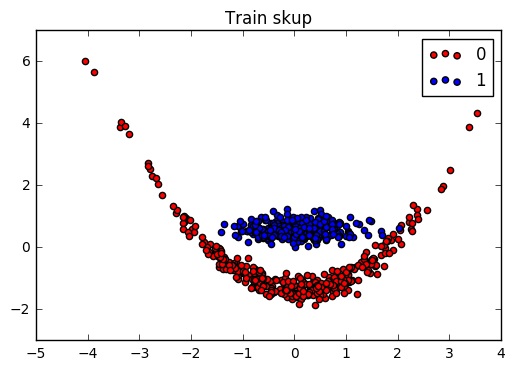

In [67]:

%matplotlib inline

def generate_data(n):
    
    #prva klasa
    n1=n/2
    x1_1=np.random.normal(0.0,2,(n1,1));
    #x1_1=.21*(6.*np.random.standard_normal((n1,1)));  
    x2_1 = np.power(x1_1,2) + np.random.standard_normal((n1,1)); 
    y_1 = np.zeros([n1,1]) 
    temp1 = np.concatenate((x1_1,x2_1,y_1),axis = 1) 
    
    #druga klasa
    n2=n-n/2
    x_2 = np.random.multivariate_normal((0,10), [[0.8,0],[0,1.2]], n2);
    y_2 = np.ones([n2,1]) 
    temp2 = np.concatenate((x_2,y_2),axis = 1) 
      
    data  = np.concatenate((temp1,temp2),axis = 0) #ulazne veličine
    
    #permutiraj podatke
    indices=np.random.permutation(n)
    data=data[indices,:]# ulazne velicine + klasa
    return data

np.random.seed(12) 
data=generate_data(1000)
A=np.split(data,[0.7*len(data)])
x1=scale(A[0][:,0])
x2=scale(A[0][:,1])
y1=scale(A[1][:,0])
y2=scale(A[1][:,1])
xtrain=np.concatenate((x1[:,np.newaxis],x2[:,np.newaxis]),axis=1)
xtest=np.concatenate((y1[:,np.newaxis],y2[:,np.newaxis]),axis=1)
plt.figure(1)
plt.title('Train skup')
plt.scatter(xtrain[:,0][np.where(A[0][:,2]==0)],xtrain[:,1][np.where(A[0][:,2]==0)], c='r',label='0')
plt.scatter(xtrain[:,0][np.where(A[0][:,2]==1)],xtrain[:,1][np.where(A[0][:,2]==1)], c='b',label='1')
plt.legend()
plt.figure(2)
plt.title('Test skup')
plt.scatter(xtest[:,0][np.where(A[1][:,2]==0)],xtest[:,1][np.where(A[1][:,2]==0)], c='r',label='0')
plt.scatter(xtest[:,0][np.where(A[1][:,2]==1)],xtest[:,1][np.where(A[1][:,2]==1)], c='b',label='1')
plt.legend()


## Izgradnja modela neuronske mreže

Koristimo MLP(MultiLayer Perceptron) neuronsku mrežu koja sadrži deset skrivenih neurona s pet neurona unutar jednog sloja. Aktivacijska funkcija neurona je sigmoidna logistička funkcija. Maksimalan broj mogućih iteracija mora biti ograničen na broj uzoraka skupa za učenje.

In [68]:
model=mlp(solver='adam',alpha=0.000001,hidden_layer_sizes=(5,10),random_state=1,activation='logistic',max_iter=700)

## Fitanje modela na skup podataka za učenje

Neuronsku mrežu učimo na skupu podataka za učenje od 700 uzoraka spremljenih u xtrain.

In [69]:
model.fit(xtrain,A[0][:,2])

MLPClassifier(activation='logistic', alpha=1e-06, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=700, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

## Predviđanje neuronske mreže na skupu testnih uzoraka

Neuronsku mrežu testiramo na skupu od 300 uzoraka xtest. Rezultat predviđanja neuronske mreže sprema se u varijablu P.

In [70]:
Y1=model.predict(xtest)
P=Y1[:,np.newaxis]

## Prikaz rezultata 

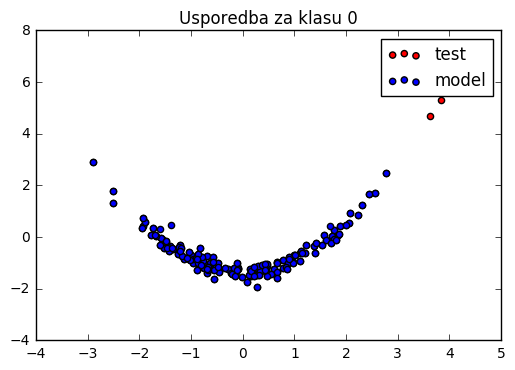

In [71]:
plt.figure(3)
plt.title('Usporedba za klasu 0')
plt.scatter(xtest[:,0][np.where(A[1][:,2]==0)],xtest[:,1][np.where(A[1][:,2]==0)], c='r',label='test')
plt.scatter(xtest[:,0][np.where(Y1==0)],xtest[:,1][Y1==0], c='b',label='model')
plt.legend()
plt.figure(4)
plt.title('Usporedba za klasu 1')
plt.scatter(xtest[:,0][np.where(A[1][:,2]==1)],xtest[:,1][np.where(A[1][:,2]==1)], c='b',label='test')
plt.scatter(xtest[:,0][np.where(Y1==1)],xtest[:,1][np.where(Y1==1)], c='r',label='model')
plt.legend()

Iz prikaza možemo zaključiti da neuronska mreža dobro pogađa uzorke testnog skupa.

## Evaluacija modela korištenjem matrice zabune

Koristimo confusion matrix u svrhu provjere točnosti i efikasnosti kreiranog modela neuronske mreže.

In [72]:
def accuaracy(c_matrix):       
    return float(c_matrix[0][0]+c_matrix[1][1])/np.sum(c_matrix)
def mcr(accuaracy):       
    return (1-accuaracy)
def precision(c_matrix):    
    return float(c_matrix[0][0])/(c_matrix[0][0]+c_matrix[1][0])  
def recall(c_matrix):       
    return float(c_matrix[0][0])/(c_matrix[0][0]+c_matrix[0][1])
def specificity(c_matrix):    
    return float(c_matrix[1][1])/(c_matrix[1][1]+c_matrix[0][1]) 
      
def plot_confusion_matrix(c_matrix):
    
    norm_conf=[]
    for i in c_matrix:
        a=0
        tmp_arr=[]
        a=sum(i,0)
        for j in i:
            tmp_arr.append(float(j)/float(a))
        norm_conf.append(tmp_arr)    
    fig=plt.figure()
    ax=fig.add_subplot(111)
    res=ax.imshow(np.array(norm_conf), cmap=plt.cm.Greys,interpolation='nearest')
    width=len(c_matrix)
    height=len(c_matrix[0])
    
    for x in xrange(width): 
         for y in xrange(height): 
             ax.annotate(str(c_matrix[x][y]), xy=(y, x),
                         horizontalalignment='center',
                         verticalalignment='center',color='green',size=20)
    fig.colorbar(res)
    numbers='0123456789'
    plt.xticks(range(width), numbers[:width])
    plt.yticks(range(height), numbers[:height]) 
    plt.ylabel('Stvarna klasa')     
    plt.title('Predvideno modelom')     
    plt.show()   

Podatci o kvaliteti i točnosti neuronske mreže, te prikaz matrice zabune nalaze se donjoj slici.

In [73]:
CM=sklm.confusion_matrix(A[1][:,2],Y1);
plot_confusion_matrix(CM)
print 'Accuaracy:', accuaracy(CM)
print 'MCR:', mcr(accuaracy(CM))
print 'Precision:',precision(CM)
print 'Recall:',recall(CM)
print 'Specificity:',specificity(CM)

Accuaracy: 0.98
MCR: 0.02
Precision: 0.98
Recall: 0.98
Specificity: 0.98


Vidimo da model od 300 uzoraka testnog skupa krivo procjenjuje 6 uzoraka. Njegova točnost je 98%.

## Prikaz granice odluke modela neuronske mreže

Funkcija granica_odluke stvara i crta granicu odluke modela neuronske mreže (također je modificirana za rad s logističkom regresijom)

In [74]:
def granica_odluke(estimator, naslov,x,y, polyFeaturesRequired=False):
    h=.02    
# kreiranje mesha   
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1    
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))       
# plotanje granice odluke za koju je dodjeljena boja svakoj točki u meshu  
    if polyFeaturesRequired==True:       
        coeff=poly.fit_transform(np.c_[xx.ravel(),yy.ravel()])    
    else:        
        coeff=np.c_[xx.ravel(), yy.ravel()]   
# testiranje mesha   
    fig, ax = plt.subplots(figsize=(8, 6))   
    Z = estimator.predict(coeff)        
#plotanje rezultata u bojama
    Z = Z.reshape(xx.shape)    
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)    
    ax.axis('off')        
# plotanje training točaka   
    ax.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Paired)       
    ax.set_title(naslov)
    
granica_odluke(model, 'MultiLayer Perceptron',xtest[:,0:2],P)    

Na prikazu granice odluke vidimo da model neuronske mreže dobro odvaja podatke, međutim moguća su daljnja poboljšanja.

## Promjena parametara modela neuronske mreže

Navedeni programski kod prikazuje utjecaj promjene parametra broja neurona neuronske mreže na sposobnost klasifikacije modela. Vrijednosti broja neurona u skrivenom sloju su 2,25 i 13. Crteži prikazuju matrice zabuna za navedene modele

Accuaracy: 0.526666666667
MCR: 0.473333333333
Precision: 0.833333333333
Recall: 0.0666666666667
Specificity: 0.513888888889


Accuaracy: 0.96
MCR: 0.04
Precision: 0.96
Recall: 0.96
Specificity: 0.96


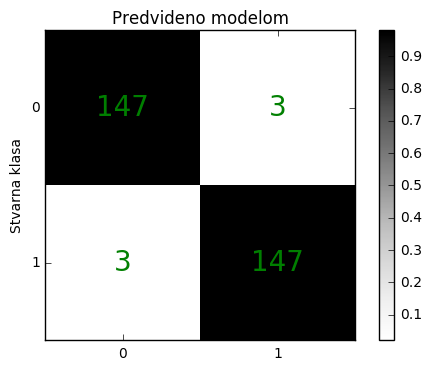

Accuaracy: 0.98
MCR: 0.02
Precision: 0.98
Recall: 0.98
Specificity: 0.98


In [75]:

model1=mlp(solver='adam',alpha=0.000001,hidden_layer_sizes=(1,10),random_state=1,activation='logistic',max_iter=700)
model1.fit(xtrain,A[0][:,2])
Y2=model1.predict(xtest)
P1=Y2[:,np.newaxis]

CM1=sklm.confusion_matrix(A[1][:,2],Y2);
plot_confusion_matrix(CM1)

print 'Accuaracy:', accuaracy(CM1)
print 'MCR:', mcr(accuaracy(CM1))
print 'Precision:',precision(CM1)
print 'Recall:',recall(CM1)
print 'Specificity:',specificity(CM1)

model2=mlp(solver='adam',alpha=0.000001,hidden_layer_sizes=(2,10),random_state=1,activation='logistic',max_iter=700)
model2.fit(xtrain,A[0][:,2])
Y3=model2.predict(xtest)
P2=Y3[:,np.newaxis]

CM2=sklm.confusion_matrix(A[1][:,2],Y3);
plot_confusion_matrix(CM2)

print 'Accuaracy:', accuaracy(CM2)
print 'MCR:', mcr(accuaracy(CM2))
print 'Precision:',precision(CM2)
print 'Recall:',recall(CM2)
print 'Specificity:',specificity(CM2)

model3=mlp(solver='adam',alpha=0.000001,hidden_layer_sizes=(25,10),random_state=1,activation='logistic',max_iter=700)
model3.fit(xtrain,A[0][:,2])
Y4=model3.predict(xtest)
P3=Y4[:,np.newaxis]

CM3=sklm.confusion_matrix(A[1][:,2],Y4);
plot_confusion_matrix(CM3)

print 'Accuaracy:', accuaracy(CM3)
print 'MCR:', mcr(accuaracy(CM3))
print 'Precision:',precision(CM3)
print 'Recall:',recall(CM3)
print 'Specificity:',specificity(CM3)

Vidljivo je da sa smanjenjem broja neurona točnost klasifikacije modela neuronske mreže pada, dok s povećanjem broja neurona ostaje ista.

# Izgradnja modela logističke regresije

Gradimo model logističke regresije, koristeći polinom četvrtog stupnja. Prije izgradnje samog modela potrebno je transformirati uzorke skupa za učenje i skupa za testiranje, to se vrši korištenjem fit_transform funkcije koja pretvare podatke u polinome četvrtog stupnja. Nakon toga gradi se model logističke regresije ograničenog broja iteracija na broj uzoraka skupa za učenje. Model se fita na podatke skupa za učenje, dok predviđanje se vrši nad skupom testnih uzoraka.

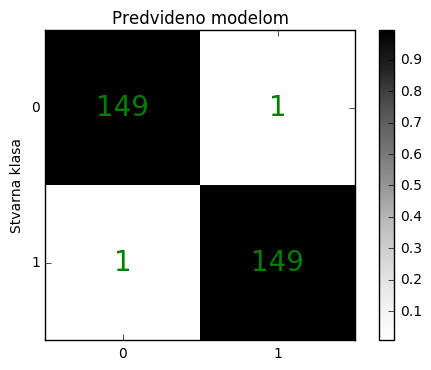

Accuaracy: 0.993333333333
MCR: 0.00666666666667
Precision: 0.993333333333
Recall: 0.993333333333
Specificity: 0.993333333333


In [76]:
#predobrada podataka
poly = pf(degree=4, include_bias = False)
ptrain=poly.fit_transform(xtrain[:,0:2])
ptest=poly.fit_transform(xtest[:,0:2])
#logistička regresija
log=lm.LogisticRegression(max_iter=700)
log.fit(ptrain,A[0][:,2])
ppredict=log.predict(ptest)
#Matrica zabune za logističku regresiju
LCM=sklm.confusion_matrix(A[1][:,2],ppredict)
plot_confusion_matrix(LCM)
print 'Accuaracy:', accuaracy(LCM)
print 'MCR:', mcr(accuaracy(LCM))
print 'Precision:',precision(LCM)
print 'Recall:',recall(LCM)
print 'Specificity:',specificity(LCM)

Iz matrice zabune logističke regresije vidljivo je da logistička regresija nad istim skupom podataka daje bolje i točnije rezultate. Logistička regresija ima preciznost od 99%.

## Prikaz granice odluke modela logističke regresije

In [77]:
granica_odluke(log, 'Logisticka regresija',ptest,ppredict,True)

Također iz granice odluke modela logističke regresije dolazi se do istog zaključka da model logističke regresije bolje i točnije klasificira podatke.